In [1]:
import numpy as np
from itertools import product
import matplotlib.pyplot as plt
import torch
import pandas as pd

In [2]:
ROBOT_PROCESS_TIME = np.array([0.372,1.1,0.685,0.47,0.489,0.271,1.1,0.62,0.333,0.23,0.878,0.809,0.711])
SLOW_OPERATOR_EXECUTION_TIME = np.array([0.5,0.667,0.333,1,0.5,0.5,0.333,1,0.667,0.5,0.667,0.5,1])
STD_DEV = 0.04

ROBOT_TASK_ID = np.array((7,8,9,11,12,13,14,15,16,17,18,19,20))
OPERATOR_TASK_ID = np.array((1,2,3,4,5,6,7,8,9,10,12,13,14))
SHARED_TASKS = np.array([7,8,9,12,13,14])

In [3]:
def generate_task_combinations():
    #return list(product([0, 1], repeat=6))
    return list(product(["R", "O"], repeat=6))
task_combinations = generate_task_combinations()
print(task_combinations)
print(len(task_combinations))

[('R', 'R', 'R', 'R', 'R', 'R'), ('R', 'R', 'R', 'R', 'R', 'O'), ('R', 'R', 'R', 'R', 'O', 'R'), ('R', 'R', 'R', 'R', 'O', 'O'), ('R', 'R', 'R', 'O', 'R', 'R'), ('R', 'R', 'R', 'O', 'R', 'O'), ('R', 'R', 'R', 'O', 'O', 'R'), ('R', 'R', 'R', 'O', 'O', 'O'), ('R', 'R', 'O', 'R', 'R', 'R'), ('R', 'R', 'O', 'R', 'R', 'O'), ('R', 'R', 'O', 'R', 'O', 'R'), ('R', 'R', 'O', 'R', 'O', 'O'), ('R', 'R', 'O', 'O', 'R', 'R'), ('R', 'R', 'O', 'O', 'R', 'O'), ('R', 'R', 'O', 'O', 'O', 'R'), ('R', 'R', 'O', 'O', 'O', 'O'), ('R', 'O', 'R', 'R', 'R', 'R'), ('R', 'O', 'R', 'R', 'R', 'O'), ('R', 'O', 'R', 'R', 'O', 'R'), ('R', 'O', 'R', 'R', 'O', 'O'), ('R', 'O', 'R', 'O', 'R', 'R'), ('R', 'O', 'R', 'O', 'R', 'O'), ('R', 'O', 'R', 'O', 'O', 'R'), ('R', 'O', 'R', 'O', 'O', 'O'), ('R', 'O', 'O', 'R', 'R', 'R'), ('R', 'O', 'O', 'R', 'R', 'O'), ('R', 'O', 'O', 'R', 'O', 'R'), ('R', 'O', 'O', 'R', 'O', 'O'), ('R', 'O', 'O', 'O', 'R', 'R'), ('R', 'O', 'O', 'O', 'R', 'O'), ('R', 'O', 'O', 'O', 'O', 'R'), ('R', '

In [4]:
def sample_execution_times(n_episodes: int = 50):
    print("Number of samplings:", n_episodes)
    task_combinations = generate_task_combinations()
    execution_times = []
    
    # for each permutation
    for combo in task_combinations:
        episode_times = []

        # for each episode
        for _ in range(n_episodes):

            # sampling operator's times
            operator_times = np.around(np.random.normal(loc=SLOW_OPERATOR_EXECUTION_TIME, scale=STD_DEV), decimals=3)

            robot_total_time = 0
            operator_total_time = 0
            
            for task in range(1, 21):

                if task in SHARED_TASKS:
                    idx = np.where(SHARED_TASKS == task)[0][0]
                    # if task is assigned to human
                    #if combo[idx] == 1:
                    if combo[idx] == 'O':
                        operator_total_time += operator_times[np.where(OPERATOR_TASK_ID == task)[0][0]]
                    # if task is assigned to robot
                    else:
                        robot_total_time += ROBOT_PROCESS_TIME[np.where(ROBOT_TASK_ID == task)[0][0]]

                elif task in ROBOT_TASK_ID:
                    robot_total_time += ROBOT_PROCESS_TIME[np.where(ROBOT_TASK_ID == task)[0][0]]

                elif task in OPERATOR_TASK_ID:
                    operator_total_time += operator_times[np.where(OPERATOR_TASK_ID == task)[0][0]]
            
            episode_times.append(max(robot_total_time, operator_total_time))
            
        execution_times.append(episode_times)
    
    return execution_times


In [5]:
execution_times  = sample_execution_times(2000)
#statistics.median(execution_times[41])

Number of samplings: 2000


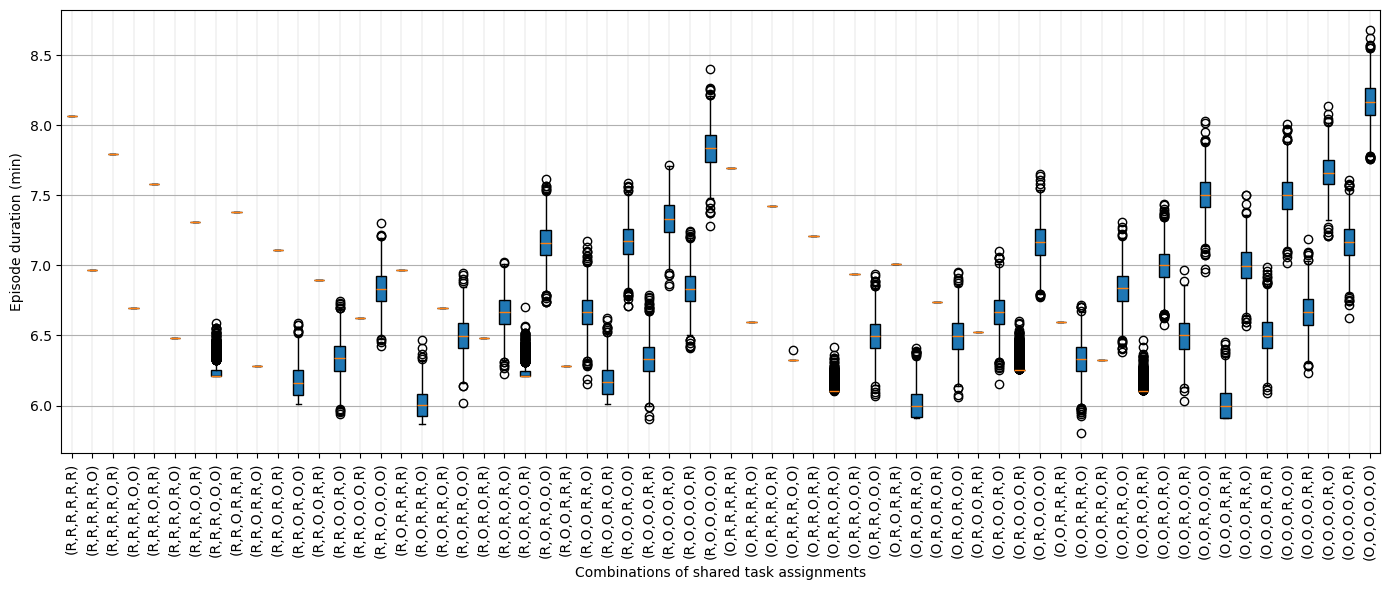

In [7]:
plt.figure(figsize=(14, 6))

plt.boxplot(execution_times, showmeans=False, vert=True, patch_artist=True)
#plt.violinplot(execution_times, showmedians=True, vert=True)

plt.xlabel("Combinations of shared task assignments")
plt.ylabel("Episode duration (min)")
plt.grid(axis="x", visible=True, linewidth=0.2)
plt.grid(axis="y", visible=True)
#plt.title("Duration distribution")
#plt.xticks(ticks=range(1,1+len(task_combinations)), labels=[str(c) for c in task_combinations], rotation=90)
plt.xticks(ticks=range(1,1+len(task_combinations)), labels=[str(c).replace(" ","").replace("'","") for c in task_combinations], rotation=90)
plt.tight_layout()
#plt.savefig("boxplot.png", dpi=600)
#plt.show()

CONFRONTO MODELLI CON /SENZA DELTA e DQN e Double DQN

In [34]:
#np.array(no_delta_Double_DQN['Double_DQN_w/o_delta']).mean()
np.array(scores["Double_DQN_w/o_delta"]).std()

0.10736163471068234

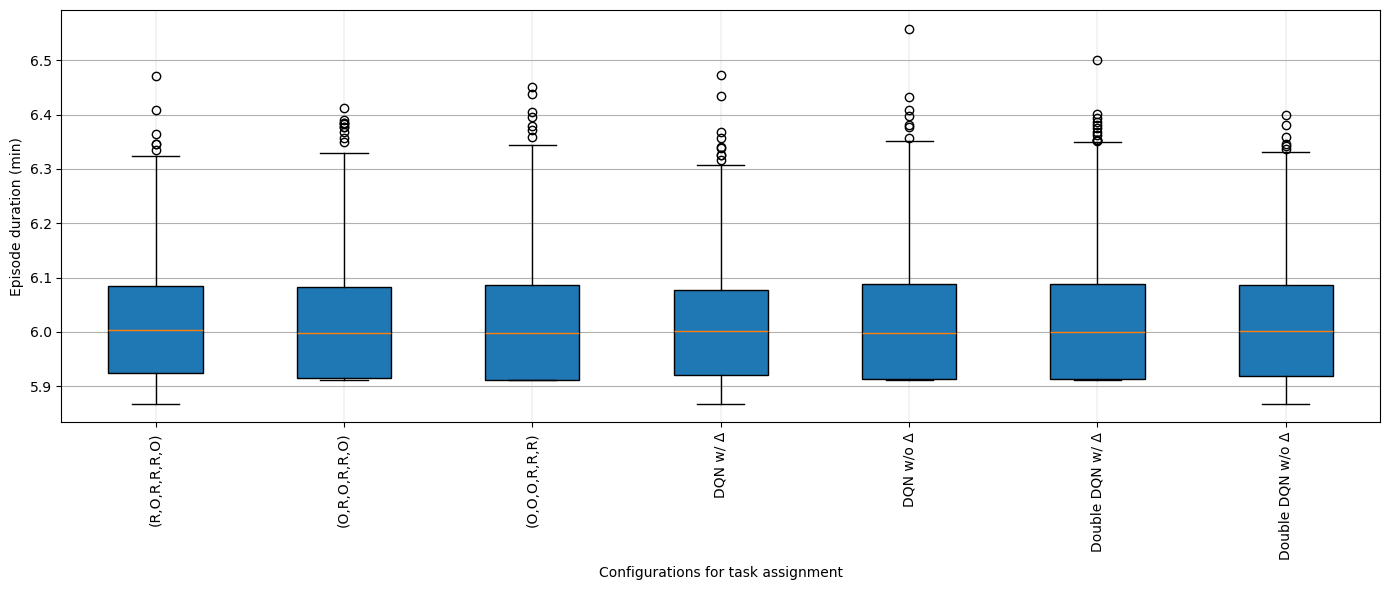

In [9]:
delta_DQN = pd.read_csv("scores_DQN_delta.csv")
no_delta_DQN = pd.read_csv("scores_DQN_no_delta.csv")
delta_Double_DQN = pd.read_csv("scores_Double_DQN_delta.csv")
no_delta_Double_DQN = pd.read_csv("scores_Double_DQN_no_delta.csv")


plt.figure(figsize=(14, 6))

plt.boxplot([execution_times[17],execution_times[41],execution_times[56], delta_DQN['DQN_w/_delta'], no_delta_DQN['DQN_w/o_delta'],\
             delta_Double_DQN['Double_DQN_w/_delta'], no_delta_Double_DQN['Double_DQN_w/o_delta']], showmeans=False, vert=True, patch_artist=True)
#plt.violinplot(execution_times, showmedians=True, vert=True)

plt.xlabel("Configurations for task assignment")
plt.ylabel("Episode duration (min)")
plt.grid(axis="x", visible=True, linewidth=0.2)
plt.grid(axis="y", visible=True)
#plt.title("Duration distribution")
#plt.xticks(ticks=range(1,1+len(task_combinations)), labels=[str(c) for c in task_combinations], rotation=90)
#plt.xticks(ticks=[1], labels=[str(task_combinations[17]).replace(" ","").replace("'","")], rotation=90)
plt.xticks(ticks=[1,2,3,4,5,6,7], labels=[str(task_combinations[i]).replace(" ","").replace("'","") for i in [17,41,56]]+["DQN w/ \u0394"]+["DQN w/o \u0394"]+["Double DQN w/ \u0394"]+["Double DQN w/o \u0394"], rotation=90)
#plt.xticks(ticks=[4], labels=["DQN w/ \u0394"], rotation=90)
plt.tight_layout()
#plt.savefig("boxplot.png", dpi=600)
#plt.show()

In [35]:
pd.DataFrame(scores).to_csv("scores_Double_DQN_no_delta.csv", index=False)

In [29]:
checkpoint = torch.load("runs/checkpoint.pt", weights_only=False)
print('\rModel saved - Episode {} - Score (SMA): {:.2f}'.format(checkpoint['episode'], checkpoint['best_score']))
from agent import Agent
from env import CobotEnv
from utils import read_hyperparameters
agent = Agent(read_hyperparameters())

# load model weights
agent.policy_net.load_state_dict(checkpoint['model_state_dict'])
agent.policy_net.eval()

env = CobotEnv()
s = []
scores={}
#combos = {}

for _ in range(2000):
    state = env.reset(0)
    episode_score = 0.0
    done = False
    while not done:
        # get valid actions
        mask = env.get_valid_actions()
        # act greedily
        action = agent.act(agent.convert_state(state), mask, epsilon=0).to(agent.device)
        agent.policy_net.eval()
        # execute action
        state, reward, done = env.step(action.item() + 1) # +1 makes the action range between 1 and ACTION_SIZE
        # cumulate reward
        episode_score += reward
    s.append(-episode_score)

scores["Double_DQN_w/o_delta"] = s

Model saved - Episode 2717 - Score (SMA): -5.93
Device used: cuda
